In [1]:
import terl
from terl.envs import TradingEnv, make_env
from terl.config import EnvConfigManager, config_checker
from terl.common.utils import random_index
import numpy as np
import pandas as pd
import vaex
from datetime import datetime
import gym

from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_transformer
from ta.momentum import rsi

from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import SubprocVecEnv, DummyVecEnv

from utils_test import transpose, minmax_scale


In [2]:
test = pd.DataFrame(index=['a','b'], columns=['symbol', 'position', 'enter_price', 'enter_datetime', 'out_price', 'trade_profit', 'trade_duration'])

In [5]:
test.loc['a']['position'] is np.nan

True

In [2]:
ct = make_column_transformer((FunctionTransformer(minmax_scale, kw_args={'axis':None}),[0]) ,remainder='passthrough')

model = make_pipeline(ct, FunctionTransformer(transpose))

In [3]:
ecm = EnvConfigManager()

In [4]:
conf = ecm.get_config('Env 1')
conf

{'data_loader': 'vaex',
 'data_path': '../data',
 'end_dt': -1,
 'indicators': {'rsi': {'indicator_func': <function ta.momentum.rsi(close, window=14, fillna=False) -> pandas.core.series.Series>,
   'symbols': ['GBPUSD'],
   'timeframes': [15],
   'params': {'window': 12},
   'series': {'close': 'close'}}},
 'num_of_history': 60,
 'obs_pipeline': None,
 'obs_var': ['GBPUSD_15_close', 'GBPUSD_15_rsi'],
 'portfolio': {'pip_resolution': 1e-05,
  'trading_price_obs': ['GBPUSD_15_close', 'GBPUSD_15_rsi']},
 'start_dt': datetime.datetime(2000, 1, 1, 0, 0),
 'symbols': ['GBPUSD'],
 'timeframes': [15]}

In [5]:
class TransposeImage(gym.ObservationWrapper):
    def __init__(self, env=None):
        """
        Transpose observation space for images
        """
        super(TransposeImage, self).__init__(env)
        self.observation_space = env.observation_space

    def observation(self, ob):
        print(ob)
        return ob

In [ ]:
env = TransposeImage(TradingEnv('envE'))

In [5]:
conf.update([('obs_pipeline', model)])
conf

{'data_loader': 'vaex',
 'data_path': '../data',
 'end_dt': -1,
 'indicators': {'rsi': {'indicator_func': <function ta.momentum.rsi(close, window=14, fillna=False) -> pandas.core.series.Series>,
   'params': {'window': 12},
   'series': {'close': 'close'}}},
 'num_of_history': 60,
 'obs_pipeline': Pipeline(steps=[('columntransformer',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('functiontransformer',
                                                   FunctionTransformer(func=<function minmax_scale at 0x7f2179a980d0>,
                                                                       kw_args={'axis': None}),
                                                   [0])])),
                 ('functiontransformer',
                  FunctionTransformer(func=<function transpose at 0x7f2179a98158>))]),
 'obs_var': ['GBPUSD_15_close'],
 'portfolio': {'pip_resolution': 1e-05,
  'trading_price_obs': ['GBPUSD_15_close']},
 'start

In [4]:
indicators = ecm.get_new_config().get('indicators')

In [6]:
ecm.save_config(conf, 'Env 1')

In [1]:
from terl.envs import TradingEnv, make_env
import numpy as np
import pandas as pd
env = TradingEnv('Env 1')

INFO:Thread-4:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
env.observation_space

Dict(market_data:Box(-inf, inf, (60, 2), float32), portfolio_state:Box(0.0, 1.0, (9,), float32))

In [3]:
env.reset()

{'market_data': array([[ 1.3088  , 44.431156],
        [ 1.30874 , 44.009808],
        [ 1.30791 , 38.496746],
        [ 1.30812 , 40.552517],
        [ 1.30773 , 37.980724],
        [ 1.30782 , 38.95524 ],
        [ 1.30771 , 38.1565  ],
        [ 1.30696 , 33.103416],
        [ 1.30678 , 31.994152],
        [ 1.30707 , 35.7769  ],
        [ 1.30785 , 44.786938],
        [ 1.30734 , 40.712948],
        [ 1.30724 , 39.935734],
        [ 1.30722 , 39.76989 ],
        [ 1.30734 , 41.362183],
        [ 1.30779 , 47.083267],
        [ 1.30722 , 41.489323],
        [ 1.30723 , 41.622234],
        [ 1.30715 , 40.814316],
        [ 1.30764 , 47.609505],
        [ 1.30778 , 49.420605],
        [ 1.30788 , 50.74689 ],
        [ 1.30798 , 52.11504 ],
        [ 1.30799 , 52.26005 ],
        [ 1.30818 , 55.076347],
        [ 1.308   , 51.911606],
        [ 1.30832 , 56.73413 ],
        [ 1.30845 , 58.573963],
        [ 1.30884 , 63.63758 ],
        [ 1.30896 , 65.06965 ],
        [ 1.30908 , 66.50

In [3]:
env._portfolio._action_map

,GBPUSD_15_close,GBPUSD_15_rsi
0,0,0
1,0,1
2,0,-1
3,1,0
4,1,1
5,1,-1
6,-1,0
7,-1,1
8,-1,-1


In [4]:
env._portfolio.legal_action()

,GBPUSD_15_close,GBPUSD_15_rsi
0,0,0
1,0,1
2,0,-1
3,1,0
4,1,1
5,1,-1
6,-1,0
7,-1,1
8,-1,-1


In [2]:
env._portfolio.state

(   GBPUSD_15_close  GBPUSD_15_rsi
 0                0              0,
 array([1., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [6]:
action = 6
print(action)
env.step(action)

6


array([[ 1.51159 , 65.95723 ],
       [ 1.51145 , 64.886795],
       [ 1.51316 , 71.131516],
       [ 1.51176 , 61.381325],
       [ 1.51136 , 58.86663 ],
       [ 1.51003 , 51.24964 ],
       [ 1.51149 , 57.789986],
       [ 1.51156 , 58.08402 ],
       [ 1.5119  , 59.57653 ],
       [ 1.51148 , 56.848743],
       [ 1.51268 , 62.238403],
       [ 1.5118  , 56.584743],
       [ 1.51117 , 52.8362  ],
       [ 1.51292 , 60.72104 ],
       [ 1.51068 , 49.228565],
       [ 1.51104 , 50.85922 ],
       [ 1.51139 , 52.47795 ],
       [ 1.51171 , 53.98999 ],
       [ 1.51232 , 56.844692],
       [ 1.51216 , 55.85249 ],
       [ 1.51241 , 57.12777 ],
       [ 1.51263 , 58.283833],
       [ 1.51238 , 56.39818 ],
       [ 1.51261 , 57.769268],
       [ 1.513   , 60.091446],
       [ 1.51321 , 61.340286],
       [ 1.51288 , 58.217106],
       [ 1.5129  , 58.35744 ],
       [ 1.51298 , 58.958054],
       [ 1.51291 , 58.15754 ],
       [ 1.51312 , 59.938713],
       [ 1.5131  , 59.67449 ],
       [

In [7]:
env._portfolio._trade

,position,enter_price,enter_datetime
GBPUSD_15_close,Short,1.51379,2013-05-30 07:30:00
GBPUSD_15_rsi,NaN,NaN,NaN


In [27]:
pd.isna(env._portfolio._trade.loc['GBPUSD_15_close']['position'])

True

In [31]:
env._portfolio._history

,symbol,position,enter_price,enter_datetime,out_price,out_datetime,trade_profit,trade_duration
0,GBPUSD_15_close,Long,2.036400,2007-08-09 02:45:00,2.036100,2007-08-09 03:00:00,-30.016899,0 days 00:15:00
1,GBPUSD_15_rsi,Long,50.360246,2007-08-09 02:45:00,47.600023,2007-08-09 03:00:00,-276022.294630,0 days 00:15:00
2,GBPUSD_15_close,Short,2.037400,2007-08-09 03:15:00,2.037400,2007-08-09 03:30:00,0.000000,0 days 00:15:00
3,GBPUSD_15_rsi,Short,58.378795,2007-08-09 03:15:00,58.378795,2007-08-09 03:30:00,0.000000,0 days 00:15:00
4,GBPUSD_15_rsi,Long,51.580204,2007-08-09 03:45:00,48.970806,2007-08-09 05:00:00,-260939.788246,0 days 01:15:00
5,GBPUSD_15_close,Long,2.036700,2007-08-09 03:45:00,2.036700,2007-08-09 05:15:00,0.000000,0 days 01:30:00
6,GBPUSD_15_rsi,Short,51.942594,2007-08-09 05:15:00,52.938429,2007-08-09 05:30:00,-99583.503430,0 days 00:15:00


In [9]:
env._dt_index_map.iloc[env._current_dt_index]

GBPUSD_15    30602
Name: 2000-03-17 05:30:00, dtype: int32

In [6]:
env._portfolio._action_map

,GBPUSD_15_close,GBPUSD_15_rsi
0,0,0
1,0,1
2,0,2
3,1,0
4,1,1
5,1,2
6,2,0
7,2,1
8,2,2


In [11]:
env._portfolio._action_map.loc[1]

0

In [95]:
env.action_space.sample()

5

In [27]:
env.reset()[0].max()

1.0

In [4]:
conf.update({
    'test' : rsi
})
ecm.save_config(conf,'Env 2')

In [14]:
test = rsi
test(**{'close':pd.Series(),'window':25})

/home/ariel/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


Series([], Name: rsi, dtype: float64)

In [3]:
conf = EnvConfigManager().get_config('Env 1')
conf

{'data_loader': 'vx',
 'data_path': '/home/ariel/Documents/ForexData',
 'end_dt': -1,
 'num_of_history': 200,
 'obs_var': ['GBPUSD_1_close',
  'GBPUSD_5_close',
  'GBPUSD_15_close',
  'GBPUSD_60_close',
  'GBPUSD_240_close',
  'EURUSD_1_close',
  'EURUSD_5_close',
  'EURUSD_15_close',
  'EURUSD_60_close',
  'EURUSD_240_close',
  'EURGBP_1_close',
  'EURGBP_5_close',
  'EURGBP_15_close',
  'EURGBP_60_close',
  'EURGBP_240_close'],
 'start_dt': datetime.datetime(2000, 1, 1, 0, 0),
 'symbols': ['GBPUSD', 'EURUSD', 'EURGBP'],
 'timeframes': [1, 5, 15, 60, 240]}

In [2]:
env = DummyVecEnv([lambda : make_env('Env 1') for _ in range(1)])
env

INFO:MainThread:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:MainThread:numexpr.utils:NumExpr defaulting to 8 threads.


In [10]:

%%time
env.envs[0].reset()

CPU times: user 22.1 ms, sys: 7.75 ms, total: 29.9 ms
Wall time: 28.8 ms


array([[1.25786, 1.25416, 1.24063, ..., 0.89524, 0.89617, 0.86216],
       [1.25773, 1.25315, 1.24253, ..., 0.89363, 0.89624, 0.86204],
       [1.25776, 1.25312, 1.23965, ..., 0.89305, 0.89614, 0.86042],
       ...,
       [1.26544, 1.26574, 1.26554, ..., 0.85872, 0.86747, 0.868  ],
       [1.26548, 1.26617, 1.2659 , ..., 0.85808, 0.86235, 0.86805],
       [1.2656 , 1.26534, 1.26617, ..., 0.85818, 0.85872, 0.86235]],
      dtype=float32)

In [3]:

%%timeit
_ = env.reset()

40.1 ms ± 140 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


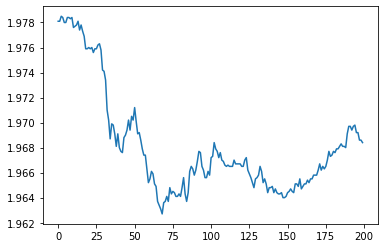

In [87]:
plt.plot(env.step(1)[:,1])

In [8]:
df = env._db.get("GBPUSD_15")

In [15]:
for col in df.column_names:
    df.rename(col, f"GBPUSD_15_{col}" )

In [19]:
df.columns

['GBPUSD_15_open',
 'GBPUSD_15_high',
 'GBPUSD_15_low',
 'GBPUSD_15_close',
 'GBPUSD_15_tick_volume']

In [3]:
cm = EnvConfigManager()

In [5]:
config_checker(cm.get_config('Test 1'))

In [7]:
%timeit random_index(60, 100000)

357 ns ± 2.49 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
